In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../password_data.csv")

In [17]:
df

,length,hasUpper,hasDigit,hasSpecial,score,strength
0,13,1,1,1,100,Strong
1,9,1,1,1,100,Strong
2,26,0,1,0,50,Medium
3,35,0,1,1,85,Strong
4,22,1,1,1,100,Strong
5,14,0,0,0,45,Weak


In [6]:
df["strength"].value_counts()

strength
Strong      4
strength    1
Medium      1
Weak        1
Name: count, dtype: int64

In [18]:
df.dtypes

length         int64
hasUpper       int64
hasDigit       int64
hasSpecial     int64
score          int64
strength      object
dtype: object

In [11]:
df.columns

Index(['length', 'has_upper', 'has_digit', 'has_special', 'score', 'strength'], dtype='object')

In [19]:
df["length"].mean()

np.float64(19.833333333333332)

In [20]:
df["score"].mean()
df["strength"].value_counts()
df.groupby("strength")["score"].mean()

strength
Medium    50.00
Strong    96.25
Weak      45.00
Name: score, dtype: float64

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["strength_encoded"] = le.fit_transform(df["strength"])

In [23]:
X = df[["length", "hasUpper", "hasDigit", "hasSpecial", "score"]]
y = df["strength_encoded"]

X, y

(   length  hasUpper  hasDigit  hasSpecial  score
 0      13         1         1           1    100
 1       9         1         1           1    100
 2      26         0         1           0     50
 3      35         0         1           1     85
 4      22         1         1           1    100
 5      14         0         0           0     45,
 0    1
 1    1
 2    0
 3    1
 4    1
 5    2
 Name: strength_encoded, dtype: int64)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape

((4, 5), (2, 5))

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 1])

In [27]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

1.0

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [29]:
# Example: length=10, hasUpper=1, hasDigit=1, hasSpecial=1, score=90
model.predict([[10, 1, 1, 1, 90]])

C:\Users\Riddhima\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
le.inverse_transform(model.predict([[10, 1, 1, 1, 90]]))

C:\Users\Riddhima\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Strong'], dtype=object)

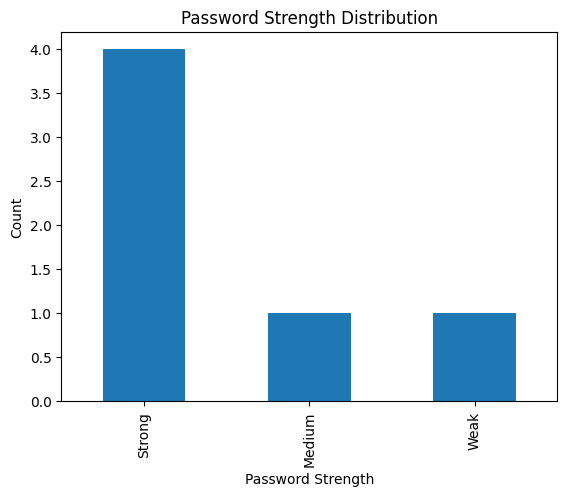

In [33]:
df["strength"].value_counts().plot(kind="bar")
plt.title("Password Strength Distribution")
plt.xlabel("Password Strength")
plt.ylabel("Count")
plt.show()

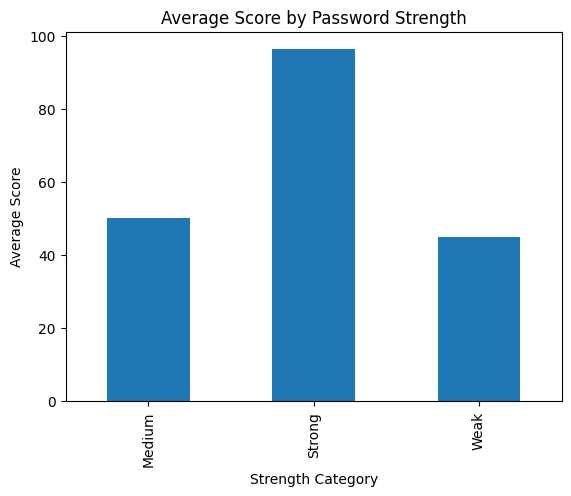

In [36]:
df.groupby("strength")["score"].mean().plot(kind="bar")
plt.title("Average Score by Password Strength")
plt.xlabel("Strength Category")
plt.ylabel("Average Score")
plt.show()